## 按roe数据处理规则处理现金流数据
化工经营活动产生的现金流净额比营业收入TTMclean.xlsx

In [6]:
import sys
sys.path.append("..")
from roeProcessTools import *

In [14]:
filePath = "/Users/zch/Desktop/internship/Feb23/ttmData/化工经营活动产生的现金流净额比营业收入TTMclean.xlsx"

In [15]:
df = pd.read_excel(filePath)

In [16]:
marked = mark(df, n=8, center=False, gaussian=True, order=4, threshold=0.8, highPct=75, increaseBool=True)

In [17]:
codes = marked.code.values

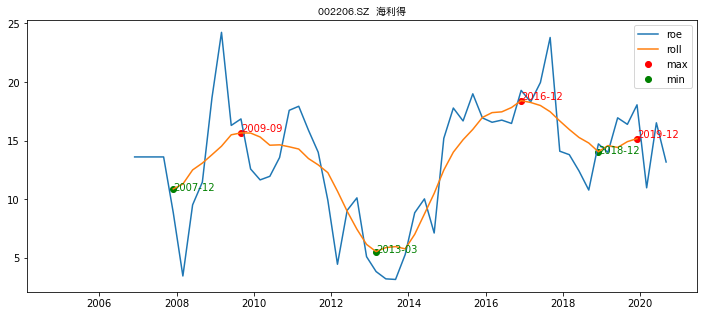

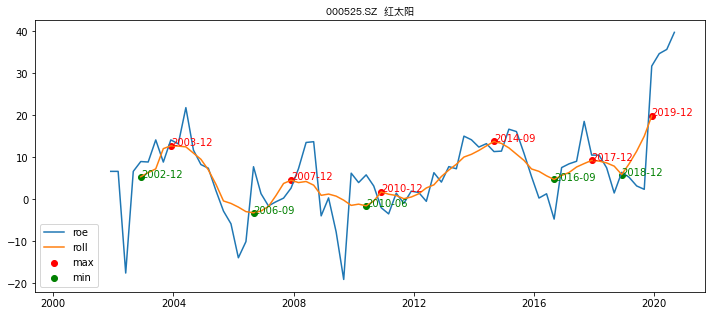

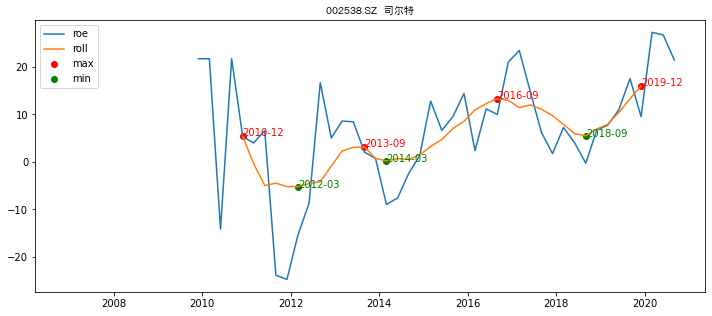

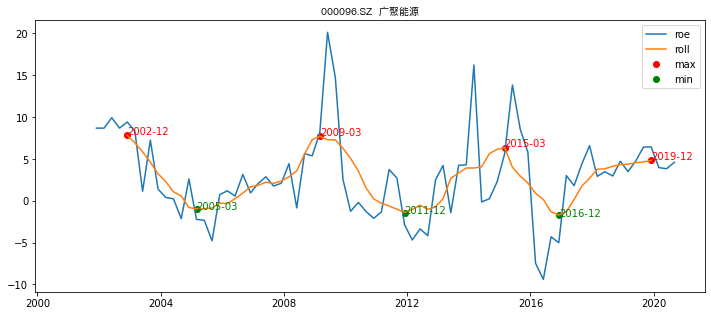

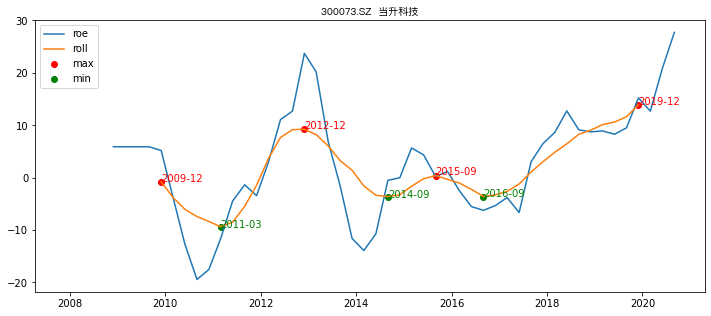

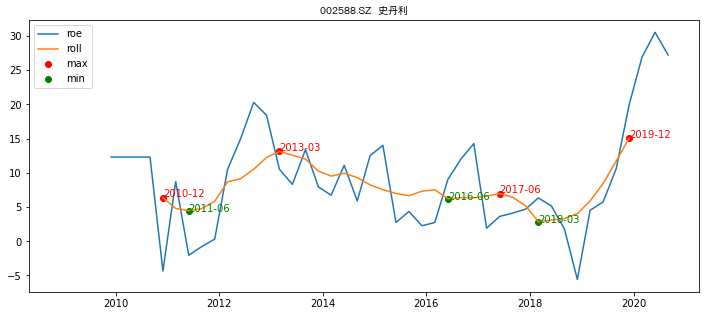

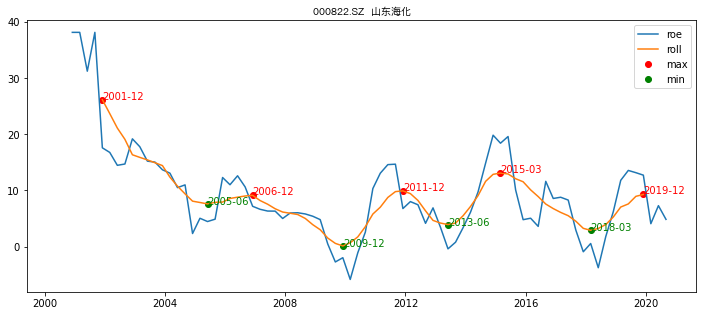

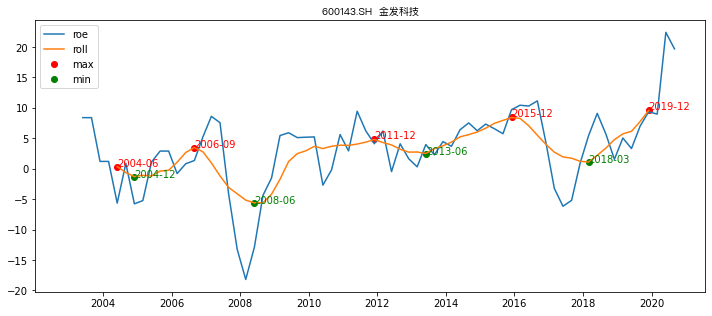

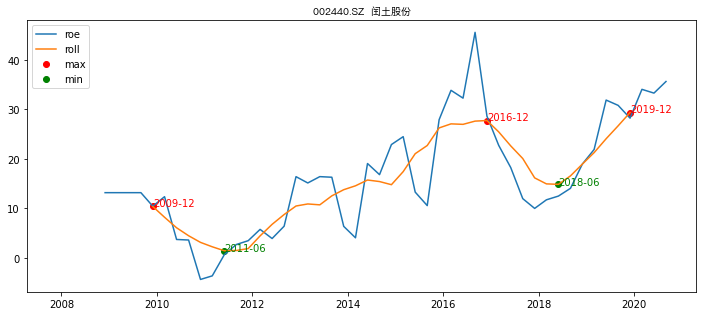

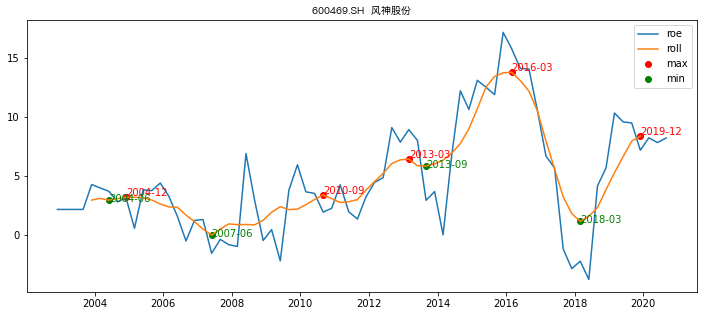

In [18]:
print()
for code in np.random.choice(codes, size=10):
    showOne(code, df)

In [19]:
marked.to_excel("化工现金流mark.xlsx", index=False)

## 和roe筛选结果取交集

In [20]:
roePath = "/Users/zch/Desktop/internship/SWROEData/selectedMark.xlsx"
roe = pd.read_excel(roePath)

In [54]:
chem = roe[roe["industry"]=="化工"]

In [57]:
pd.merge(chem, marked, how="inner", on=["code", "name", "mark"], suffixes=("_roe", "_cf"))

,code,name,mark,startTime_roe,industry,startTime_cf
0,002080.SZ,中材科技,I,2017-09,化工,2017-06
1,002556.SZ,辉隆股份,I,2019-12,化工,2018-12
2,002683.SZ,宏大爆破,I,2016-12,化工,2016-12


In [45]:
marked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 2 to 201
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   code       93 non-null     object
 1   name       93 non-null     object
 2   mark       93 non-null     object
 3   startTime  93 non-null     object
dtypes: object(4)
memory usage: 3.6+ KB
